The order of accuracy of each method (2nd question of assignment 3) is shown in image - "Solution_erros.jpeg"
Fig. 7.2, 7.6, 7.7, 7.8 are reproduced using this code

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def explicit(u,N,n,L):
    ni = 0
    while(ni<n-1):
        j = 0
        while(j<N-2):
            j+=1
            u[j,ni+1] = L*u[j-1,ni]+(1-2*L)*u[j,ni]+L*u[j+1,ni]
        ni+=1
    return u

def u0(x):
    return 4*x*(1-x)

def ua(t):
    return 0

def ub(t):
    return 0

0.5


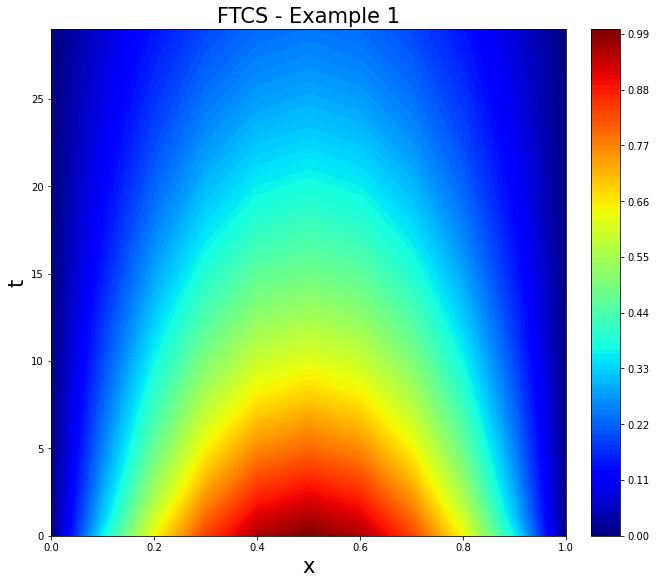

In [2]:
t0 = 0
t1 = 1

a = 0
b = 1

n = 30

del_x = 0.1
del_t = del_x**2*0.5

N = int((b-a)/del_x + 1)

D = 1

L = D*del_t/del_x**2
print(L)

u = np.zeros((N,n))
X = np.zeros(N)
T = np.zeros(n)

for i in range(N):
    u[i,0] = u0(a+i*del_x)
    X[i] = a+i*del_x

for i in range(n):
    u[0,i] = ua(t0+i*del_t)
    u[N-1,i] = ub(t0+i*del_t)
    T[i] = t0+i*del_t
    
X,T = np.meshgrid(X,T)

u = explicit(u,N,n,L)

fig = plt.figure(figsize=(9,8),constrained_layout=True)
plt.contourf(X,T/del_t,np.transpose(u),levels=100,cmap=plt.cm.jet)
plt.colorbar()
plt.xlabel('x',fontsize=21)
plt.ylabel('t',fontsize=21)
plt.title('FTCS - Example 1',fontsize=21)
plt.savefig('./fig_7.6.pdf')
plt.show()

In [3]:
def implicit(u,N,n,M,L):                
    for i in range(n-1):
        temp = np.array(u[1:-1,i])
        t_sol = np.linalg.solve(M,temp)
        for j in range(N-2):
            u[j+1,i+1] = t_sol[j]
        u[0,i+1] = u[1,i+1]
        u[-1,i+1] = u[-2,i+1]

def u0(x):
    return np.exp(-x**2)

4.999999999999999


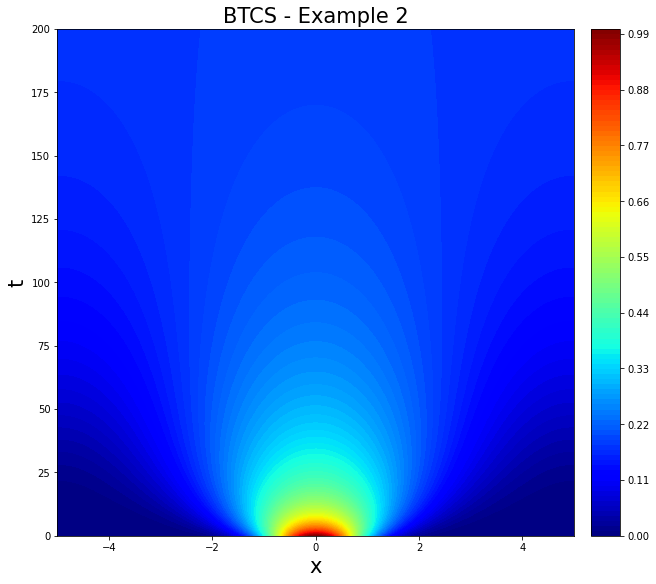

In [4]:
t0 = 0
t1 = 1

a = -5
b = 5

n = 201

del_x = 0.1
del_t = 0.05

N = int((b-a)/del_x + 1)

D = 1.

L = D*del_t/del_x**2
print(L)

u = np.zeros((N,n))
X = np.zeros(N)
T = np.zeros(n)

for i in range(N):
    u[i,0] = u0(a+i*del_x)
    X[i] = a+i*del_x

for i in range(n):
    T[i] = t0+i*del_t
    
X,T = np.meshgrid(X,T)

M = np.zeros((N-2,N-2))
for i in range(N-2):
    for j in range(N-2):
        if(i==j):
            if(i==0 or i==N-3):
                M[i,j] = 1+L
            else:
                M[i,j] = 1+2*L
        if(i==j-1 or i==j+1):
            M[i,j] = -L

#M = np.linalg.inv(M)
implicit(u,N,n,M,L)

fig = plt.figure(figsize=(9,8),constrained_layout=True)
plt.contourf(X,T/del_t,np.transpose(u),levels=100,cmap=plt.cm.jet)
plt.colorbar()
plt.xlabel('x',fontsize=21)
plt.ylabel('t',fontsize=21)
plt.title('BTCS - Example 2',fontsize=21)
plt.savefig('./fig_7.7.pdf')
plt.show()

In [5]:
def crank(u,N,n,M1,M2,L):                
    for i in range(n-1):
        temp = np.matmul(M2,u[1:-1,i])
        temp[0] += L*(u[0,i+1]+u[0,i])
        temp[-1] += L*(u[-1,i+1]+u[-1,i])
        t_sol = np.linalg.solve(M1,temp)
        for j in range(N-2):
            u[j+1,i+1] = t_sol[j]  

def u0(x):
    return 2 - 1.5*x + np.sin(np.pi*x)

def ua(t):
    return 2

def ub(t):
    return 0.5

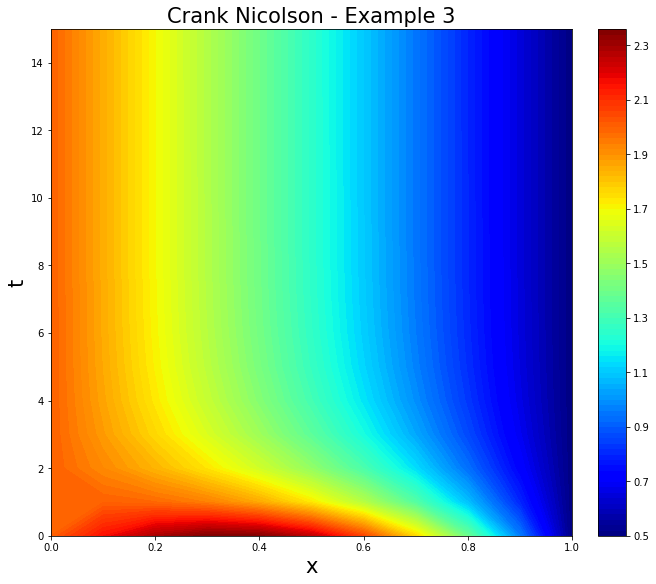

In [6]:
t0 = 0
t1 = 0.

a = 0
b = 1

n = 16

del_x = 0.1
del_t = 0.05

N = int((b-a)/del_x + 1)

D = 1.44

L = D*del_t/del_x**2

u = np.zeros((N,n))
X = np.zeros(N)
T = np.zeros(n)

for i in range(N):
    u[i,0] = u0(a+i*del_x)
    X[i] = a+i*del_x

for i in range(n):
    u[0,i] = ua(t0+i*del_t)
    u[N-1,i] = ub(t0+i*del_t)
    T[i] = t0+i*del_t
    
X,T = np.meshgrid(X,T)

M1 = np.zeros((N-2,N-2))
M2 = np.zeros((N-2,N-2))
for i in range(N-2):
    for j in range(N-2):
        if(i==j):
            M1[i,j] = 2+2*L
            M2[i,j] = 2-2*L
        if(i==j-1 or i==j+1):
            M1[i,j] = -L
            M2[i,j] = L
            
crank(u,N,n,M1,M2,L)

fig = plt.figure(figsize=(9,8),constrained_layout=True)
plt.contourf(X,T/del_t,np.transpose(u),levels=100,cmap=plt.cm.jet)
plt.colorbar()
plt.xlabel('x',fontsize=21)
plt.ylabel('t',fontsize=21)
plt.title('Crank Nicolson - Example 3',fontsize=21)
plt.savefig('./fig_7.8.pdf')
plt.show()

In [7]:
def F(a,k):
    temp = 1-4*a*np.sin(np.pi/2.*k)
    return -np.log(abs(1-4*a*np.sin(np.pi/2.*k)**2))/a

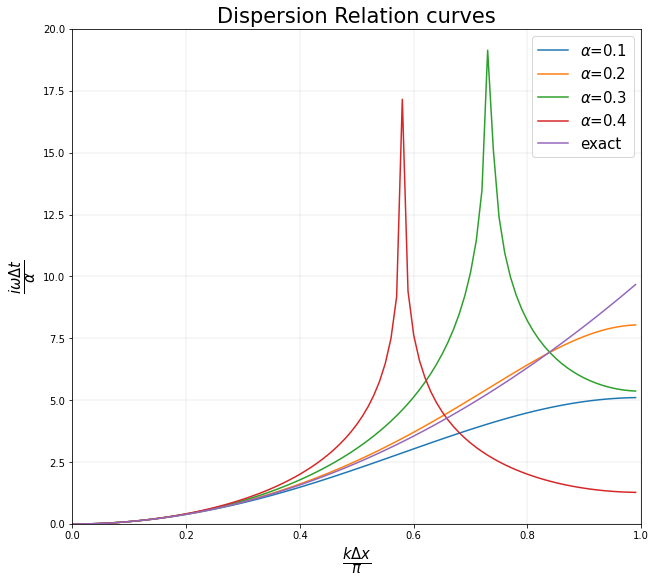

In [8]:
fig = plt.figure(figsize=(9,8),constrained_layout=True)
k = np.arange(0,1,0.01)
plt.plot(k,F(0.1,k),label=r'$\alpha$=0.1')
plt.plot(k,F(0.2,k),label=r'$\alpha$=0.2')
plt.plot(k,F(0.3,k),label=r'$\alpha$=0.3')
plt.plot(k,F(0.4,k),label=r'$\alpha$=0.4')
plt.plot(k,(np.pi*k)**2,label='exact')
plt.xlabel(r'$\frac{k\Delta x}{\pi}$',fontsize=21)
plt.ylabel(r'$\frac{i \omega \Delta t}{\alpha}$',fontsize=21)
plt.grid(linewidth=0.21)
plt.xlim(0,1)
plt.ylim(0,20)
plt.legend(fontsize=15)
plt.title('Dispersion Relation curves',fontsize=21)
plt.savefig('./fig_7.2.pdf')
plt.show()